In [0]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

###Import MNIST data from the cloud

In [105]:
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


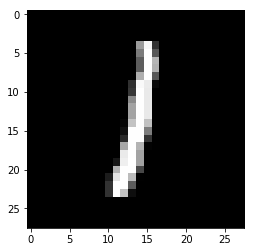

In [106]:
print(mnist.train.labels[4])
plt.imshow(np.reshape(mnist.train.images[4], (28,28)), cmap='gray')

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


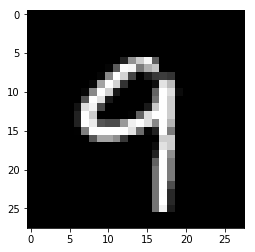

In [107]:
print(mnist.train.labels[8])
plt.imshow(np.reshape(mnist.train.images[8], (28,28)), cmap='gray')

In [108]:
print(mnist.train.labels.shape)

(55000, 10)


In [109]:
print(mnist.train.labels[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


###Defining input and variables

In [110]:
x = tf.placeholder("float", [None, 784])
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
y_ = tf.placeholder("float", [None, 10])

print("x: ",x,"\nW: ",W,"\nb: ",b,"\ny_: ",y_)

x:  Tensor("Placeholder_20:0", shape=(?, 784), dtype=float32) 
W:  <tf.Variable 'Variable_20:0' shape=(784, 10) dtype=float32_ref> 
b:  <tf.Variable 'Variable_21:0' shape=(10,) dtype=float32_ref> 
y_:  Tensor("Placeholder_21:0", shape=(?, 10), dtype=float32)


###Neural Network for MNIST classification

In [0]:
y = tf.nn.softmax(tf.matmul(x,W)+b)
cross_entropy = -tf.reduce_sum(y_ * tf.log(y))
train_step = tf.train.GradientDescentOptimizer(0.001).minimize(cross_entropy)

In [0]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

####Training process using Gradient Descent

In [113]:
combined_loss = []
for i in range(1000):
  batch_xs, batch_ys = mnist.train.next_batch(50)
  loss, step = sess.run([cross_entropy, train_step], feed_dict = {x: batch_xs, y_: batch_ys})
  combined_loss.append(loss)
  print("Iteration: ", i, "|| Loss: ",loss)

Iteration:  0 || Loss:  115.129265
Iteration:  1 || Loss:  112.91498
Iteration:  2 || Loss:  110.05109
Iteration:  3 || Loss:  107.99462
Iteration:  4 || Loss:  105.38079
Iteration:  5 || Loss:  106.32762
Iteration:  6 || Loss:  100.853355
Iteration:  7 || Loss:  99.00484
Iteration:  8 || Loss:  97.14795
Iteration:  9 || Loss:  97.19629
Iteration:  10 || Loss:  90.86159
Iteration:  11 || Loss:  94.206116
Iteration:  12 || Loss:  96.14871
Iteration:  13 || Loss:  89.68089
Iteration:  14 || Loss:  88.03455
Iteration:  15 || Loss:  82.61012
Iteration:  16 || Loss:  85.15178
Iteration:  17 || Loss:  77.55069
Iteration:  18 || Loss:  79.0556
Iteration:  19 || Loss:  83.05857
Iteration:  20 || Loss:  76.33248
Iteration:  21 || Loss:  80.67259
Iteration:  22 || Loss:  75.996155
Iteration:  23 || Loss:  69.80636
Iteration:  24 || Loss:  69.02705
Iteration:  25 || Loss:  74.3072
Iteration:  26 || Loss:  76.64535
Iteration:  27 || Loss:  73.84583
Iteration:  28 || Loss:  70.05492
Iteration:  29 

####Visualizing loss of the trained model over the iterations

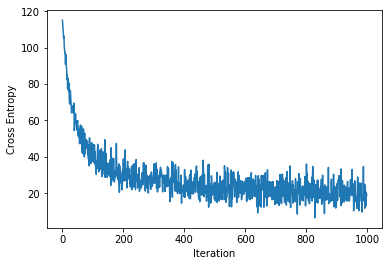

In [114]:
plt.plot(combined_loss)
plt.ylabel('Cross Entropy')
plt.xlabel('Iteration')
plt.show()

Figure above shows that the loss of the model that uses a given learning rate ($\alpha$ = 0.001) in the Stochastic Gradient Descent (SGD) optimizer can reduce the loss along the training process.

####Calculating the accuracy

In [0]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
true_pred = tf.cast(correct_prediction, "float")
accuracy = tf.reduce_mean(true_pred)

In [0]:
correct_prediction, true_pred, accuracy = sess.run([correct_prediction, true_pred, accuracy], 
                                                   feed_dict = {x: mnist.test.images, y_: mnist.test.labels})

In [117]:
correct_prediction.tolist()[:10]

[True, True, True, True, True, True, True, True, False, True]

Function tf.equal() to get the correct_prediction returns boolean result, where True and False indicate the right and wrong class prediction respectively.

In [118]:
true_pred.tolist()[:10]

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0]

Function tf.cast() transforms the result of correct_prediction to the certain destination type of variable (in this case, boolean results are transformed to float, where 1=True and 0=False).

In [119]:
accuracy

0.9003

Calculating the mean of binary output from true_pred can directly results the accuracy of out trained model. Applying tf.reduce_mean() here is the same as counting the instances with the true prediction divided by the number of all instances used for training the model.